## Project 1 - Part 3

We will continue to work on your sales prediction project. The goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in increasing sales.

For Part 3, your task is to build several data visualizations that help you better understand the data and to help your stakeholders better understand trends in the data. Feel free to get creative with this week - this is your chance to set your project apart from others with exceptional visualizations and analyses.

*   Use the data you cleaned last week. If needed, you can download the raw data. (Note: Original data source)

*   Create various data visualizations that help you better understand the data you are working with (exploratory data analysis) and help others understand trends in the data (explanatory data analysis).

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

raw_df = pd.read_csv('/content/drive/MyDrive/Coding Dojo/Week 3/clean_sales_prediction.csv')
raw_df.head().T

,0,1,2,3,4
Item_Identifier,FDA15,DRC01,FDN15,FDX07,NCD19
Item_Weight,9.3,5.92,17.5,19.2,8.93
Item_Fat_Content,Low Fat,Regular,Low Fat,Regular,Non-Edible
Item_Visibility,0.0160473,0.0192782,0.0167601,0.0229105,0.0161643
Item_Type,Dairy,Soft Drinks,Meat,Fruits and Vegetables,Household
Item_MRP,249.809,48.2692,141.618,182.095,53.8614
Outlet_Identifier,OUT049,OUT018,OUT049,OUT010,OUT013
Outlet_Establishment_Year,1999,2009,1999,1998,1987
Outlet_Size,Medium,Medium,Medium,Medium,High
Outlet_Location_Type,Tier 1,Tier 3,Tier 1,Tier 3,Tier 3


## Property Review

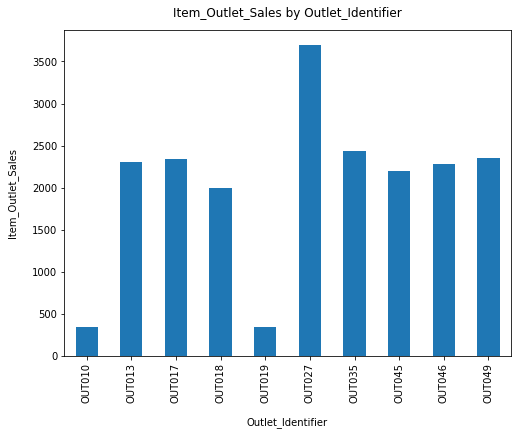

In [2]:
table1 = pd.pivot_table(raw_df,index=['Outlet_Identifier'],values=['Item_Outlet_Sales'])
table1
table1.plot(kind='bar',legend=None, figsize=(8, 6))
plt.xlabel('Outlet_Identifier', labelpad=14)
plt.ylabel('Item_Outlet_Sales', labelpad=14)
plt.title('Item_Outlet_Sales by Outlet_Identifier', y=1.02);

plt.show();

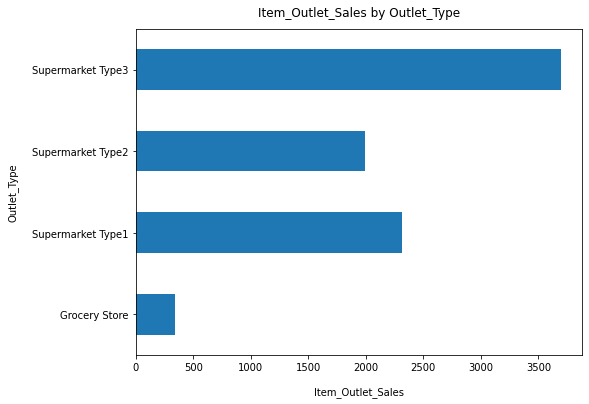

In [3]:
table2 = pd.pivot_table(raw_df,index=['Outlet_Type'],values=['Item_Outlet_Sales'])
table2
table2.plot(kind='barh',legend=None, figsize=(8, 6))
plt.xlabel('Item_Outlet_Sales', labelpad=14)
plt.ylabel('Outlet_Type', labelpad=14)
plt.title('Item_Outlet_Sales by Outlet_Type', y=1.02);

plt.show();

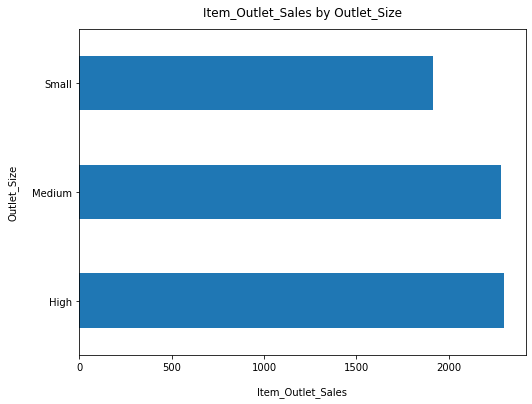

In [4]:
table3 = pd.pivot_table(raw_df,index=['Outlet_Size'],values=['Item_Outlet_Sales'])
table3
table3.plot(kind='barh',legend=None, figsize=(8, 6))
plt.xlabel('Item_Outlet_Sales', labelpad=14)
plt.ylabel('Outlet_Size', labelpad=14)
plt.title('Item_Outlet_Sales by Outlet_Size', y=1.02);

plt.show();

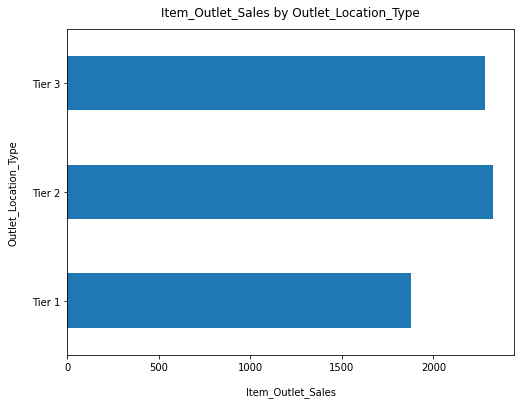

In [5]:
table4 = pd.pivot_table(raw_df,index=['Outlet_Location_Type'],values=['Item_Outlet_Sales'])
table4
table4.plot(kind='barh',legend=None, figsize=(8, 6))
plt.xlabel('Item_Outlet_Sales', labelpad=14)
plt.ylabel('Outlet_Location_Type', labelpad=14)
plt.title('Item_Outlet_Sales by Outlet_Location_Type', y=1.02);

plt.show();

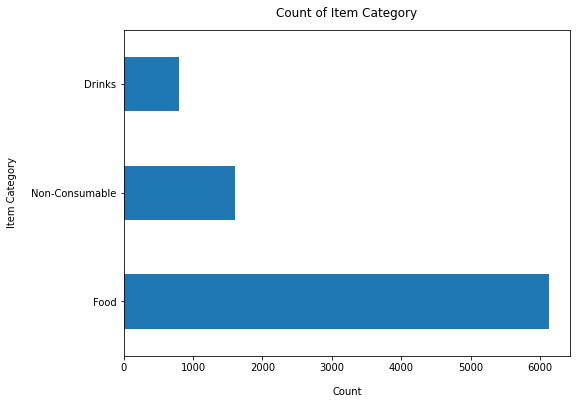

In [6]:
count_it = raw_df['Item_Category'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel('Count', labelpad=14)
plt.ylabel('Item Category', labelpad=14)
plt.title('Count of Item Category', y=1.02);
plt.show()

## Product Review

In [7]:
# Modify Item_Fat_Content to three categories
raw_df['Item_Fat_Content'] = raw_df['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})

# Classify Non-Consumerable to Non-Edible in Item_Fat_Content #tidepods
raw_df.loc[raw_df['Item_Category']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
raw_df['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

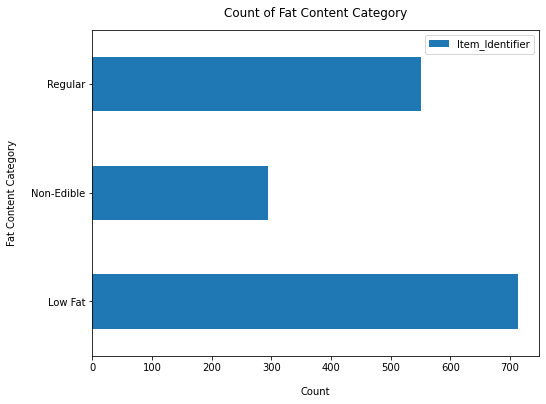

In [8]:
table1 = pd.pivot_table(raw_df,index=['Item_Fat_Content'],values=['Item_Identifier'],aggfunc=pd.Series.nunique)
table1.plot(kind='barh', figsize=(8, 6))
plt.xlabel('Count', labelpad=14)
plt.ylabel('Fat Content Category', labelpad=14)
plt.title('Count of Fat Content Category', y=1.02);
plt.show();

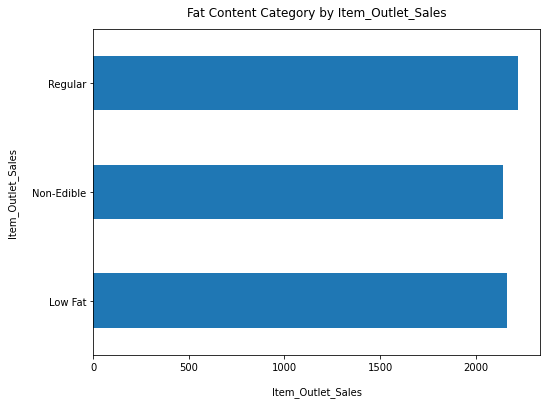

In [9]:
table1 = pd.pivot_table(raw_df,index=['Item_Fat_Content'],values=['Item_Outlet_Sales'])
table1.plot(kind='barh',legend=None, figsize=(8, 6))
plt.xlabel('Item_Outlet_Sales', labelpad=14)
plt.ylabel('Item_Outlet_Sales', labelpad=14)
plt.title('Fat Content Category by Item_Outlet_Sales', y=1.02);
plt.show();

In [10]:
# get the first two characters of ID
raw_df['Item_Category'] = raw_df['Item_Identifier'].apply(lambda x: x[0:2])
# rename to new categories
raw_df['Item_Category'] = raw_df['Item_Category'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
raw_df['Item_Category'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Category, dtype: int64

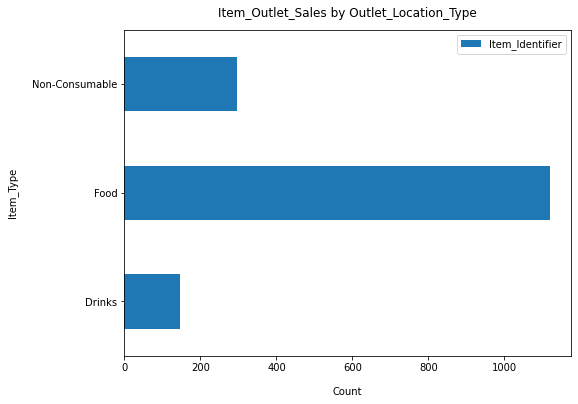

In [12]:
table2 = pd.pivot_table(raw_df,index=['Item_Category'],values=['Item_Identifier'],aggfunc=pd.Series.nunique)
table2.plot(kind='barh', figsize=(8, 6))
plt.xlabel('Count', labelpad=14)
plt.ylabel('Item_Type', labelpad=14)
plt.title('Item_Outlet_Sales by Outlet_Location_Type', y=1.02);
plt.show();

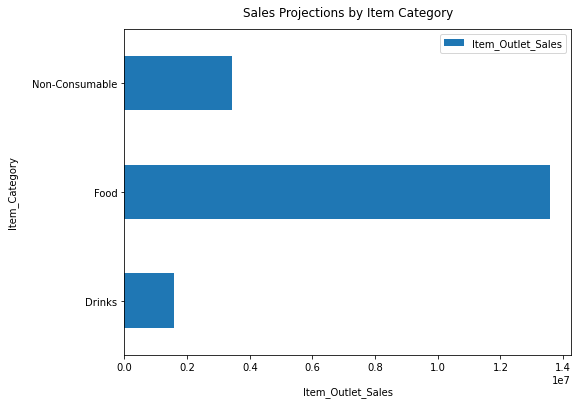

In [13]:
table2 = pd.pivot_table(raw_df,index=['Item_Category'],values=['Item_Outlet_Sales'],aggfunc=np.sum)
table2.plot(kind='barh', figsize=(8, 6))
plt.xlabel('Item_Outlet_Sales', labelpad=14)
plt.ylabel('Item_Category', labelpad=14)
plt.title('Sales Projections by Item Category', y=1.02);
plt.show();

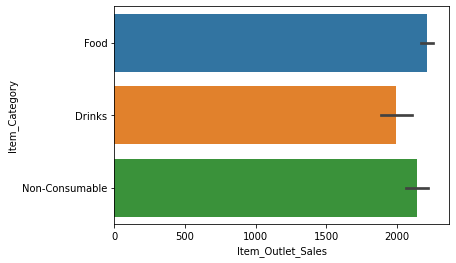

In [14]:
sns.barplot(x=raw_df.Item_Outlet_Sales, y=raw_df.Item_Category)

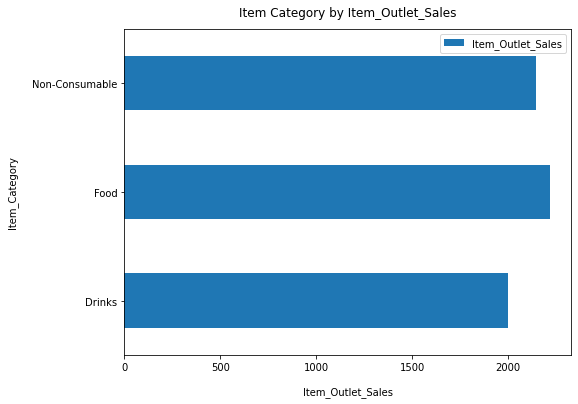

In [15]:
table2 = pd.pivot_table(raw_df,index=['Item_Category'],values=['Item_Outlet_Sales'])
table2.plot(kind='barh', figsize=(8, 6))
plt.xlabel('Item_Outlet_Sales', labelpad=14)
plt.ylabel('Item_Category', labelpad=14)
plt.title('Item Category by Item_Outlet_Sales', y=1.02);
plt.show();

In [ ]:
table2 = pd.pivot_table(raw_df,index=['Outlet_Type'],columns=['Item_Fat_Content'],
                        values=['Item_Identifier'],aggfunc=pd.Series.nunique)
table2.plot(kind='barh', figsize=(8, 6))
plt.xlabel('Count', labelpad=14)
plt.ylabel('Outlet_Type', labelpad=14)
plt.title('Fat Content Category by Outlet_Type', y=1.02);
plt.legend(loc=(1.02,0))
plt.show();

In [ ]:
table6 = pd.pivot_table(raw_df,index=['Item_Type'],values=['Item_Outlet_Sales'])
table6
table6.plot(kind='barh',legend=None, figsize=(8, 6))
plt.xlabel('Item_Outlet_Sales', labelpad=14)
plt.ylabel('Item_Type', labelpad=14)
plt.title('Item_Type by Item_Outlet_Sales', y=1.02);

plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


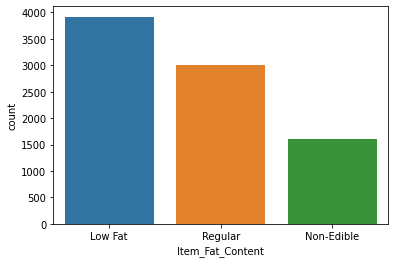

In [16]:
sns.countplot(raw_df.Item_Fat_Content);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


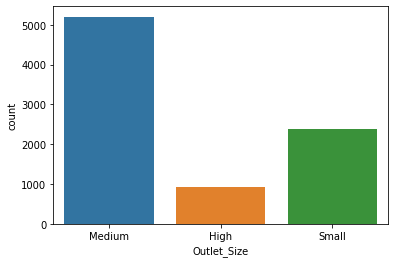

In [17]:
sns.countplot(raw_df.Outlet_Size);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


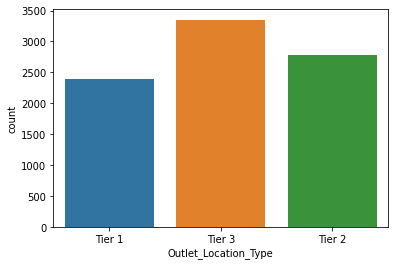

In [18]:
sns.countplot(raw_df.Outlet_Location_Type);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


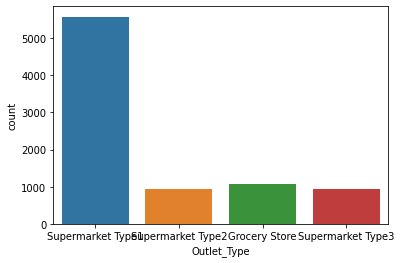

In [19]:
sns.countplot(raw_df.Outlet_Type);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


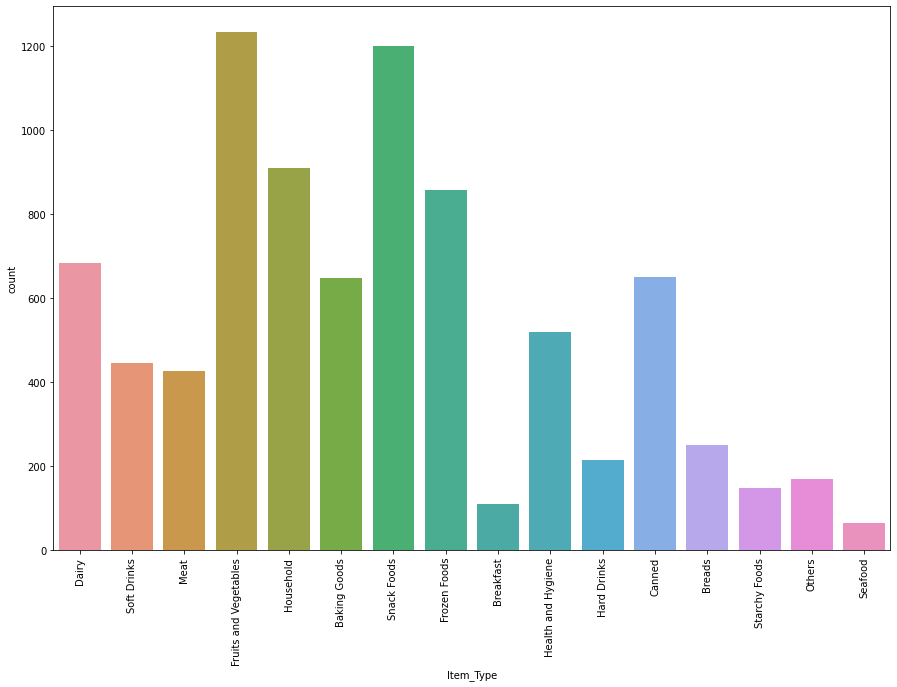

In [20]:
plt.figure(figsize=(15,10))
x_label = list(raw_df.Item_Type.unique())
chart = sns.countplot(raw_df.Item_Type)
chart.set_xticklabels(labels=x_label, rotation=90);

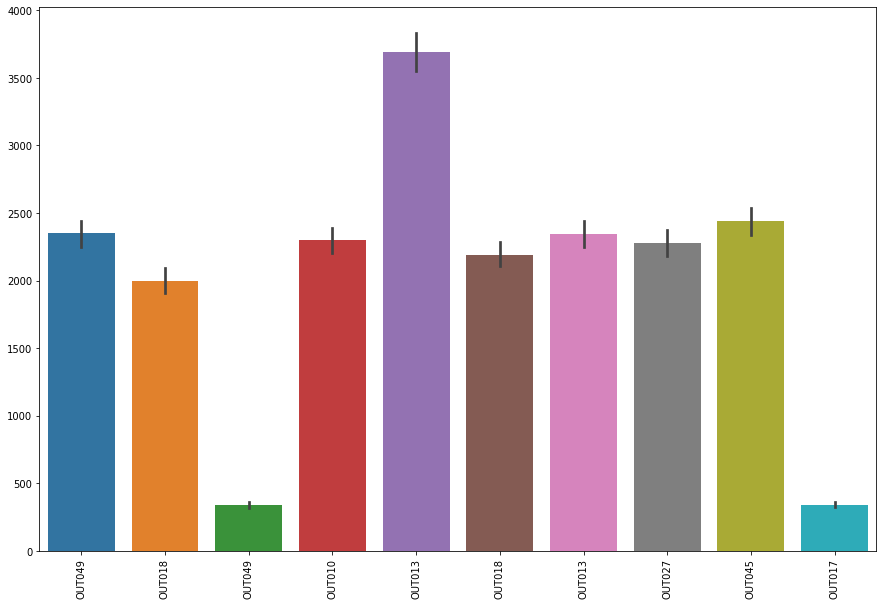

In [21]:
plt.figure(figsize=(15,10))
x_label = list(raw_df.Outlet_Identifier)
y_label = list(raw_df.Item_Outlet_Sales)
chart = sns.barplot(x=x_label,y=y_label)
chart.set_xticklabels(labels=x_label, rotation=90);